In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
hue_idx = wine.feature_names.index('hue')
alcohol_idx = wine.feature_names.index('alcohol')
malic_acid_idx = wine.feature_names.index('malic_acid')

feature_pairs = [
    (hue_idx, alcohol_idx),
    (hue_idx, malic_acid_idx),
    (alcohol_idx, malic_acid_idx)
]

results = {}

for pair in feature_pairs:
    X_train_pair = X_train[:, pair]
    X_test_pair = X_test[:, pair]

    bayes.fit(X_train_pair, y_train)
    knn.fit(X_train_pair, y_train)

    bayes_pred = bayes.predict(X_test_pair)
    knn_pred = knn.predict(X_test_pair)

    results[pair] = {
        'Bayes': bayes_pred,
        'KNN': knn_pred
    }

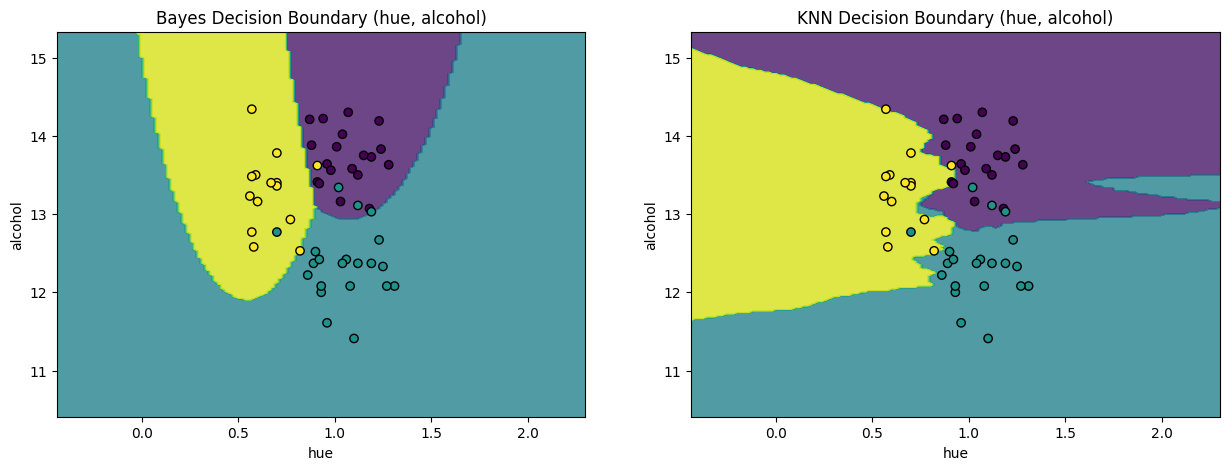

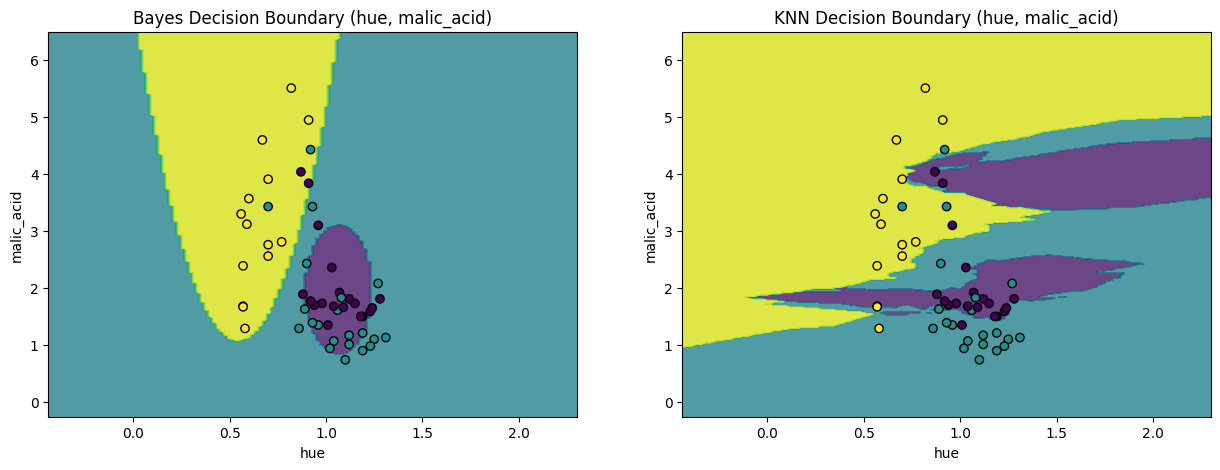

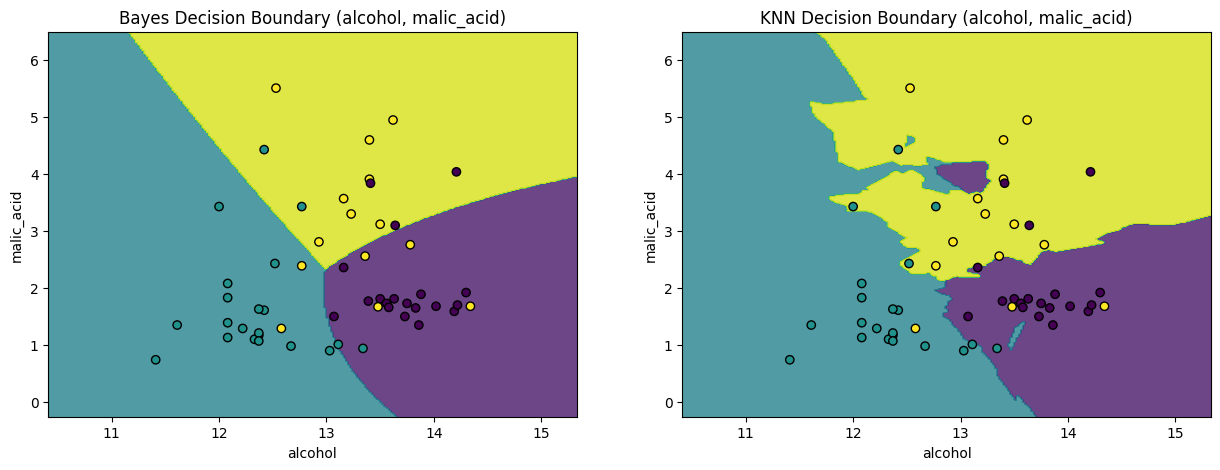

In [ ]:
def plot_decision_boundary(X, y, classifiers, titles, pair):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig, axs = plt.subplots(1, len(classifiers), figsize=(15, 5))

    for idx, (classifier, title) in enumerate(zip(classifiers, titles)):
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axs[idx].contourf(xx, yy, Z, alpha=0.8)
        axs[idx].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        axs[idx].set_title(title)
        axs[idx].set_xlabel(wine.feature_names[pair[0]])
        axs[idx].set_ylabel(wine.feature_names[pair[1]])

    plt.show()

for pair in feature_pairs:
    X_train_pair = X_train[:, pair]
    X_test_pair = X_test[:, pair]

    bayes.fit(X_train_pair, y_train)

    knn.fit(X_train_pair, y_train)

    plot_decision_boundary(X_test_pair, y_test, [bayes, knn],
                           [f'Bayes Decision Boundary ({wine.feature_names[pair[0]]}, {wine.feature_names[pair[1]]})',
                            f'KNN Decision Boundary ({wine.feature_names[pair[0]]}, {wine.feature_names[pair[1]]})'],
                           pair)

In [ ]:
accuracies = {}

for pair in feature_pairs:
    X_test_pair = X_test[:, pair]

    bayes_pred = results[pair]['Bayes']
    bayes_accuracy = accuracy_score(y_test, bayes_pred)

    knn_pred = results[pair]['KNN']
    knn_accuracy = accuracy_score(y_test, knn_pred)

    accuracies[pair] = {
        'Bayes': bayes_accuracy,
        'KNN': knn_accuracy
    }

for pair, acc in accuracies.items():
    print(f"Pair: ({wine.feature_names[pair[0]]}, {wine.feature_names[pair[1]]})")
    print(f"Bayes Accuracy: {acc['Bayes']:.2f}")
    print(f"KNN Accuracy: {acc['KNN']:.2f}")
    print()

Pair: (hue, alcohol)
Bayes Accuracy: 0.89
KNN Accuracy: 0.85

Pair: (hue, malic_acid)
Bayes Accuracy: 0.67
KNN Accuracy: 0.72

Pair: (alcohol, malic_acid)
Bayes Accuracy: 0.76
KNN Accuracy: 0.80



In [ ]:
best_combination = None
best_accuracy = 0

for pair, acc in accuracies.items():
    if acc['Bayes'] > best_accuracy:
        best_accuracy = acc['Bayes']
        best_combination = (pair, 'Bayes')

    if acc['KNN'] > best_accuracy:
        best_accuracy = acc['KNN']
        best_combination = (pair, 'KNN')

best_combination_features = (wine.feature_names[best_combination[0][0]], wine.feature_names[best_combination[0][1]])

print(f"Best combination: {best_combination_features} with classifier: {best_combination[1]} and accuracy: {best_accuracy:.2f}")

Best combination: ('hue', 'alcohol') with classifier: Bayes and accuracy: 0.89


In [ ]:
#Наилучшей парой оказалась 'hue', 'alcohol' и классификатор Байеса с точностью 0.89, однако для других пар точность KNN больше точности Байеса.